In [2]:
%matplotlib widget
from bmcs_shell.api import *
import numpy as np
import matplotlib.pyplot as plt

# WB curved slab demonstrator

## Geometry

In [5]:
wb_shell = WBTessellation4PEx(
                         a=1000/4,
                         b = 1615/4, 
                         c = 645/4, 
                         e_x = 286/4,
                         gamma=0.683, # a value of gamma = 0.75 was estimated from normals, but a CAD comparison showed that 0.75 doesn't lead to closer geometry to the scanned 
                         n_phi_plus=2, 
                         n_x_plus=2, 
                         wireframe_width=5,
                        ##---- Trimming function works only in WBTessellation4P ----##
                         trim_half_cells_along_y=True,
                         trim_half_cells_along_x=True,
#                          align_outer_nodes_along_x=True,
)
wb_shell.interact()

Output()

Exception occurred in traits notification handler for event object: TraitChangeEvent(object=<bmcs_shell.folding.geometry.wb_tessellation.wb_tessellation_4p_ex.WBTessellation4PEx object at 0x10eec3290>, name='gamma', old=0.683, new=1.5706963267948966)
Traceback (most recent call last):
  File "/Users/gui/Documents/bmcs_folder/bmcs_virtual/lib/python3.12/site-packages/ipywidgets/widgets/widget_selection.py", line 133, in findvalue
    return next(x for x in array if compare(x, value))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
StopIteration

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gui/Documents/bmcs_folder/bmcs_virtual/lib/python3.12/site-packages/ipywidgets/widgets/widget_selection.py", line 242, in _validate_value
    return findvalue(self._options_values, value, self.equals) if value is not None else None
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gui/Documents

Plot tessellation with gamma= 89.99 °


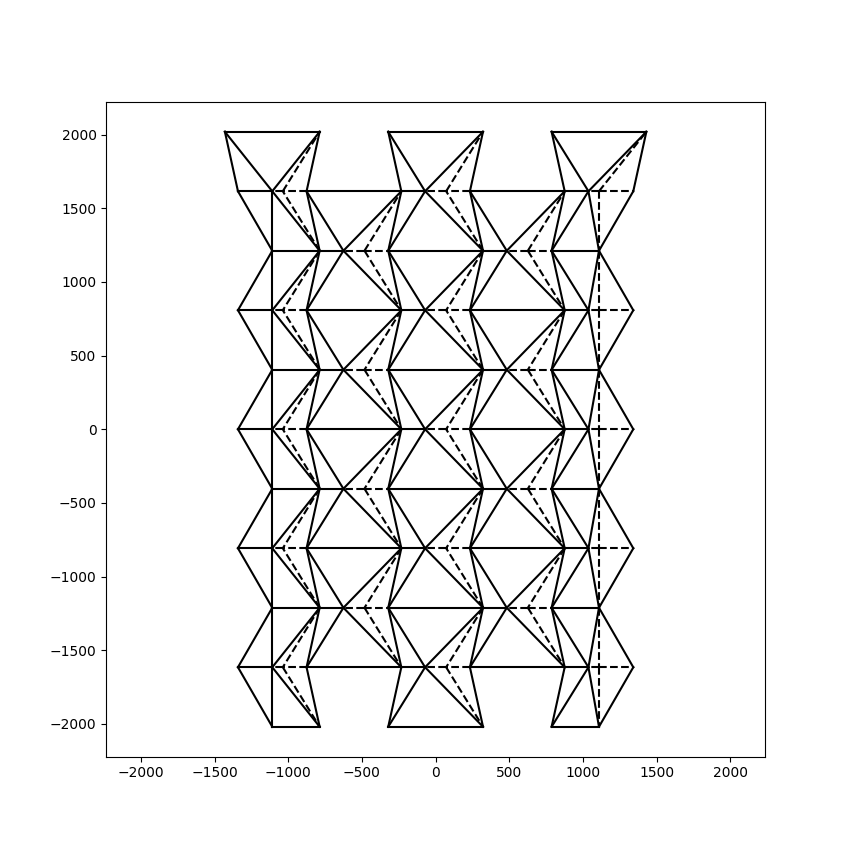

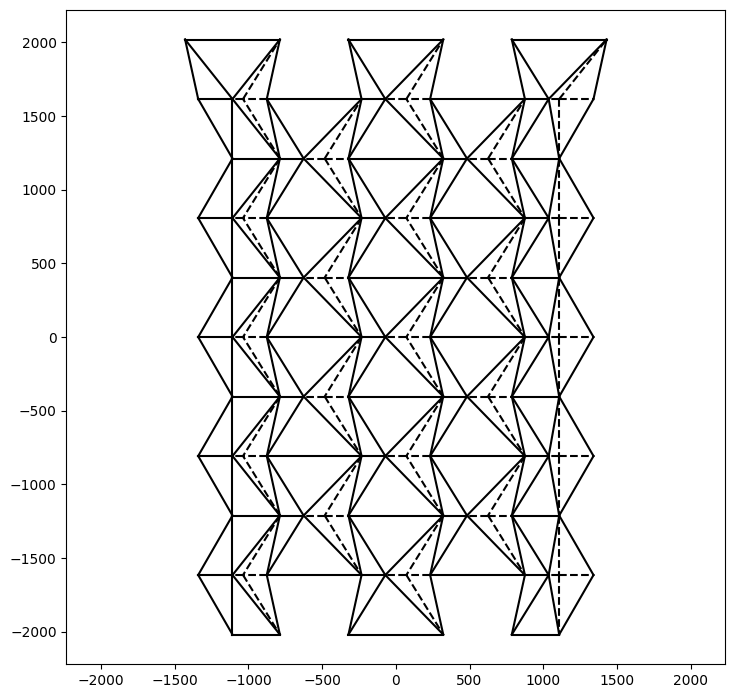

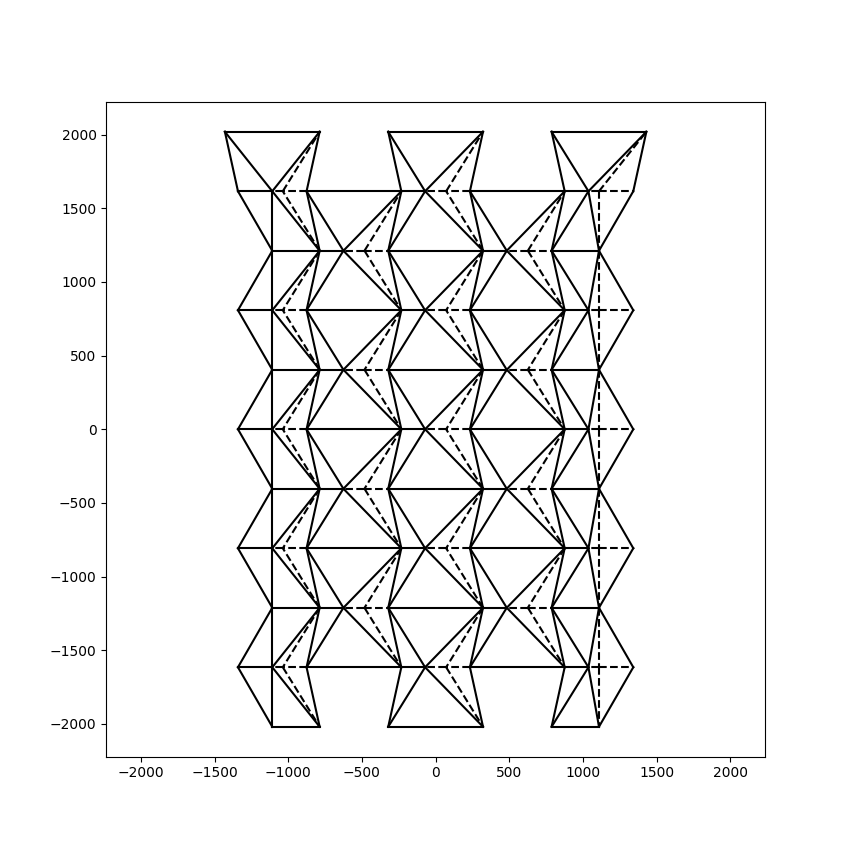

In [4]:
fig, ax = wb_shell.plot_folding_pattern()
fig
# fig.savefig('folding_patt.pdf')